In [66]:
import pandas as pd
df = pd.read_csv('cthall_no_covid.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682323 entries, 0 to 682322
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        682323 non-null  int64  
 1   tran_date         682323 non-null  object 
 2   tran_time         682323 non-null  int64  
 3   play_date         682323 non-null  int64  
 4   seat              682323 non-null  object 
 5   price             682323 non-null  int64  
 6   performance_code  682323 non-null  int64  
 7   pre_open_date     420761 non-null  object 
 8   open_date         682323 non-null  object 
 9   genre             666398 non-null  object 
 10  running_time      682323 non-null  int64  
 11  member_yn         682323 non-null  object 
 12  time              682323 non-null  object 
 13  floor             682323 non-null  object 
 14  zone              682323 non-null  object 
 15  col               682323 non-null  object 
 16  ori_price         68

In [68]:
df.columns

Index(['Unnamed: 0', 'tran_date', 'tran_time', 'play_date', 'seat', 'price',
       'performance_code', 'pre_open_date', 'open_date', 'genre',
       'running_time', 'member_yn', 'time', 'floor', 'zone', 'col',
       'ori_price', 'date_diff'],
      dtype='object')

In [69]:
df_group = df.groupby(['performance_code','play_date'],as_index=False).agg({'floor' : 'count',
                                                     'ori_price':'sum',
                                                                     'price':'sum'})
df_group.rename(columns = {'floor' : 'cus_count',
                    'ori_price' : 'ori_total_price',
                          'price' : 'total_price'},inplace=True)
pd.options.display.float_format = '{:.2f}'.format

In [70]:
df_group

,performance_code,play_date,cus_count,ori_total_price,total_price
0,1,20230426,870,1632727.27,1323000
1,7,20190830,2110,557272.73,429000
2,23,20191025,943,21093827.75,20695000
3,29,20190822,1868,0.00,0
4,29,20190823,1802,0.00,0
...,...,...,...,...,...
490,2903,20221008,1167,1204545.45,927000
491,2920,20190117,915,35643636.36,24706000
492,2932,20191225,69,1913636.36,1810000
493,2936,20220710,685,45373684.21,47134000


In [71]:
df_total = pd.merge(df,df_group, how = 'left',left_on=['performance_code','play_date'],right_on=['performance_code','play_date'])

In [72]:
df_total.columns

Index(['Unnamed: 0', 'tran_date', 'tran_time', 'play_date', 'seat', 'price',
       'performance_code', 'pre_open_date', 'open_date', 'genre',
       'running_time', 'member_yn', 'time', 'floor', 'zone', 'col',
       'ori_price', 'date_diff', 'cus_count', 'ori_total_price',
       'total_price'],
      dtype='object')

- genre, time -> BarChart
- running_time, date_diff -> Scatter

In [73]:
df_total[(df_total['ori_total_price']!=0) & (df_total['cus_count']!=0)]

,Unnamed: 0,tran_date,tran_time,play_date,seat,price,performance_code,pre_open_date,open_date,genre,...,member_yn,time,floor,zone,col,ori_price,date_diff,cus_count,ori_total_price,total_price
1,7,2019-06-13,954,20190723,2층 D블록8열 4,0,827,2019-06-02,2019-06-02,교향곡,...,N,morning,2층,D블록,8열,0.00,11.00,1878,3371818.18,3185000
2,9,2019-07-03,908,20190721,1층 C블록17열 3,75000,1528,NaN,2019-04-13,클래식,...,N,morning,1층,C블록,17열,68181.82,NaN,1399,22861272.73,24137000
3,11,2019-10-05,1417,20191201,3층 BOX9 5,24000,315,NaN,2019-10-05,오페라,...,Y,afternoon,3층,BOX,9,30000.00,NaN,550,12158277.51,10778000
4,16,2023-02-24,2214,20230412,1층 C블록2열 2,130000,1684,2023-02-18,2023-02-19,합창,...,Y,evening,1층,C블록,2열,118181.82,6.00,1247,48099138.76,46151000
5,18,2019-12-20,1106,20200211,2층 BOX2 2,42000,76,2019-12-20,2019-12-23,클래식,...,Y,morning,2층,BOX,2,60000.00,0.00,1957,11259090.91,7372000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682315,1920845,2022-06-02,1512,20220705,1층 B블록21열 8,0,1862,NaN,2022-05-21,합창,...,N,afternoon,1층,B블록,21열,0.00,NaN,2164,4019090.91,3558000
682318,1920849,2023-05-16,1743,20230603,3층 D블록6열 6,40000,1666,2023-03-17,2023-03-18,실내악,...,Y,afternoon,3층,D블록,6열,36363.64,60.00,1337,82728421.05,78448000
682319,1920850,2019-09-29,934,20191010,2층 E블록7열 15,0,2132,2019-09-06,2019-09-06,클래식,...,N,morning,2층,E블록,7열,0.00,23.00,2432,7769090.91,7297000
682321,1920855,2023-05-22,1729,20230613,3층 A블록6열 4,10000,2825,2023-05-05,2023-05-07,교향곡,...,Y,afternoon,3층,A블록,6열,9090.91,17.00,2241,62414385.03,54783000


<Axes: xlabel='cus_count', ylabel='ori_total_price'>

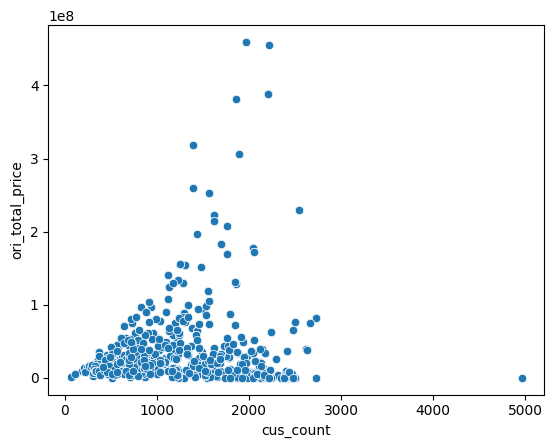

In [74]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="ori_total_price")

<Axes: xlabel='cus_count', ylabel='running_time'>

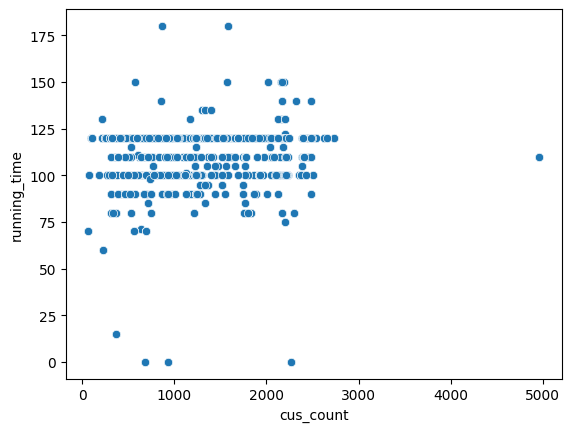

In [75]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="running_time")

<Axes: xlabel='ori_total_price', ylabel='running_time'>

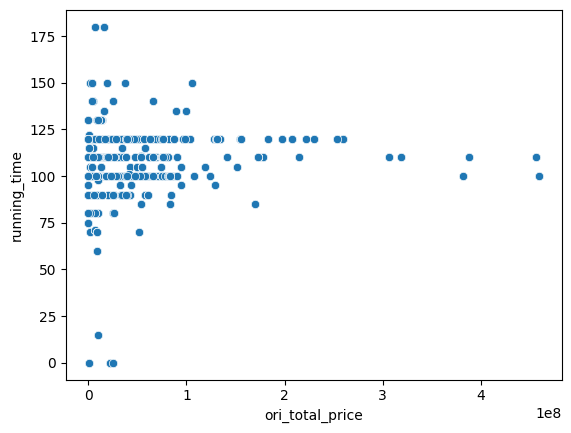

In [78]:
import seaborn as sns
sns.scatterplot(data=df_total, x="ori_total_price", y="running_time")

<Axes: xlabel='cus_count', ylabel='date_diff'>

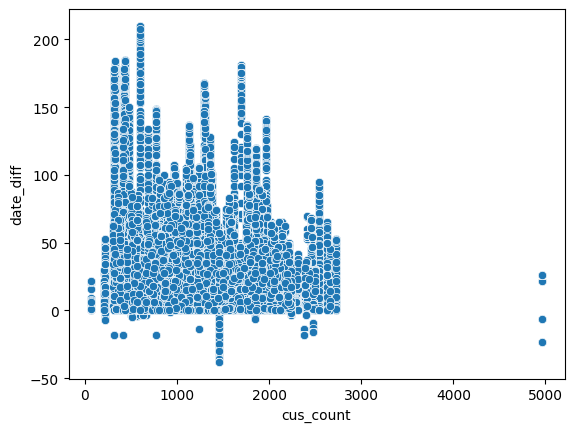

In [76]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="date_diff")

<Axes: xlabel='ori_total_price', ylabel='date_diff'>

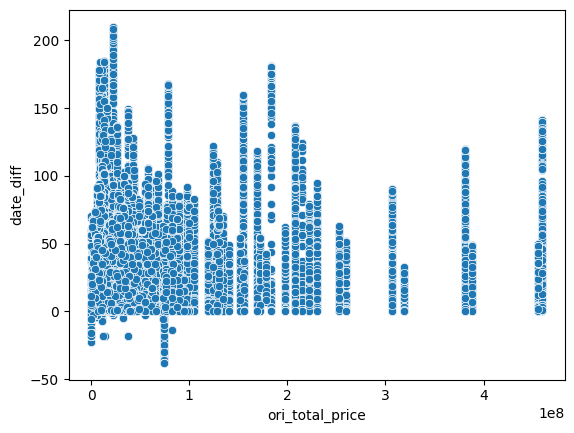

In [79]:
import seaborn as sns
sns.scatterplot(data=df_total, x="ori_total_price", y="date_diff")

In [83]:
df_total[['cus_count','ori_total_price']].corr()

,cus_count,ori_total_price
cus_count,1.00,-0.08
ori_total_price,-0.08,1.00


In [84]:
df_total[['cus_count','date_diff']].corr()

,cus_count,date_diff
cus_count,1.00,-0.30
date_diff,-0.30,1.00


In [85]:
df_total.corr()

ValueError: could not convert string to float: '2019-10-20'